In [44]:
import math
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [36]:
# Load dataset 
raw_train = pd.read_csv('data/train.csv')
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
## Missing data imputation (Age, Embarked)

# Impute age using the average age of one's given pronounciation 
# Mr., Miss., Master., Mrs., and else (including Don., Rev., Dr., Mlle., Col., Capt.)
clean_train = raw_train
index_Mr = list()
index_Miss = list()
index_Master = list()
index_Mrs = list()
index_else = list()
for name in clean_train['Name'].iteritems():
    if 'Mr.' in name[1]:
        index_Mr.append(name[0])
    elif 'Miss.' in name[1]:
        index_Miss.append(name[0])
    elif 'Master.' in name[1]:
        index_Master.append(name[0])
    elif 'Mrs.' in name[1]:
        index_Mrs.append(name[0])
    else:
        index_else.append(name[0]) 

Prefix_Mr = clean_train.loc[index_Mr]
Prefix_Miss = clean_train.loc[index_Miss]
Prefix_Master = clean_train.loc[index_Master]
Prefix_Mrs = clean_train.loc[index_Mrs]
Prefix_else = clean_train.loc[index_else]

Prefix_Mr['Age'] = Prefix_Mr['Age'].map(lambda x: Prefix_Mr['Age'].mean() if math.isnan(x) else x)
Prefix_Miss['Age'] = Prefix_Miss['Age'].map(lambda x: Prefix_Miss['Age'].mean() if math.isnan(x) else x)
Prefix_Master['Age'] = Prefix_Master['Age'].map(lambda x: Prefix_Master['Age'].mean() if math.isnan(x) else x)
Prefix_Mrs['Age'] = Prefix_Mrs['Age'].map(lambda x: Prefix_Mrs['Age'].mean() if math.isnan(x) else x)
Prefix_else['Age'] = Prefix_else['Age'].map(lambda x: Prefix_else['Age'].mean() if math.isnan(x) else x)

clean_train.loc[index_Mr] = Prefix_Mr
clean_train.loc[index_Miss] = Prefix_Miss
clean_train.loc[index_Master] = Prefix_Master
clean_train.loc[index_Mrs] = Prefix_Mrs
clean_train.loc[index_else] = Prefix_else

# Impute Embarked using the most frequent type of Embarked symbol
temp = clean_train[clean_train['Embarked'].isna()]
temp = temp.assign(Embarked = 'S')
clean_train[clean_train['Embarked'].isna()] = temp

# Some final data cleaning
clean_train = clean_train[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
clean_train = clean_train.set_index('PassengerId')
# Do feature selection? For reducing the correlation between featrues, 
# also select the most effective subset of featuers.

# Maybe a package in skitlearn that find correlation in features.. Also can calculate the correlation matrix myself

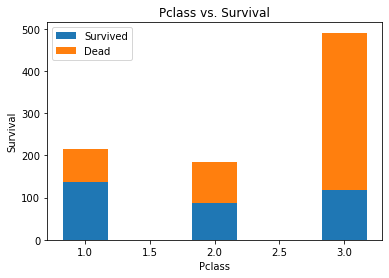

In [50]:
## Explanatory variable analysis:
# Pclass
width = 0.35
Pclass1 = clean_train[clean_train['Pclass'] == 1]
Pclass1_s = Pclass1[Pclass1['Survived'] == 1]
Pclass1_d = Pclass1[Pclass1['Survived'] == 0]

Pclass2 = clean_train[clean_train['Pclass'] == 2]
Pclass2_s = Pclass2[Pclass2['Survived'] == 1]
Pclass2_d = Pclass2[Pclass2['Survived'] == 0]

Pclass3 = clean_train[clean_train['Pclass'] == 3]
Pclass3_s = Pclass3[Pclass3['Survived'] == 1]
Pclass3_d = Pclass3[Pclass3['Survived'] == 0]

fig, ax1 = plt.subplots()
ax1.bar(range(1, 4), [len(Pclass1_s), len(Pclass2_s), len(Pclass3_s)], width, label = 'Survived')
ax1.bar(range(1, 4), [len(Pclass1_d), len(Pclass2_d), len(Pclass3_d)], width, 
        bottom = [len(Pclass1_s), len(Pclass2_s), len(Pclass3_s)], label = 'Dead')
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Survival')
ax1.set_title('Pclass vs. Survival')
ax1.legend()

'''
The Pclass vs. Survival bar plot shows that the 1st class (Pclass = 1) group has the highest survival rate while
the 3rd class group has the lowest survival rate. 
'''

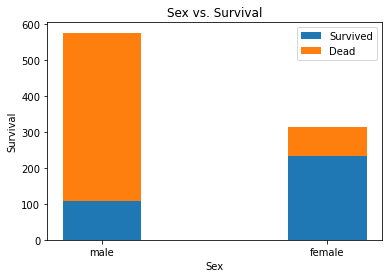

In [53]:
# Sex

width = 0.35
male = clean_train[clean_train['Sex'] == 'male']
male_s = male[male['Survived'] == 1]
male_d = male[male['Survived'] == 0]

female = clean_train[clean_train['Sex'] == 'female']
female_s = female[female['Survived'] == 1]
female_d = female[female['Survived'] == 0]

fig, ax2 = plt.subplots()
ax2.bar(['male', 'female'], [len(male_s), len(female_s)], width, label = 'Survived')
ax2.bar(['male', 'female'], [len(male_d), len(female_d)], width, 
        bottom = [len(male_s), len(female_s)], label = 'Dead')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Survival')
ax2.set_title('Sex vs. Survival')
ax2.legend()

'''
The Sex vs. Survival bar plot shows that male has relatively low survival rate versus female
'''

'\nThe Sex vs. Survival bar plot shows that male has relatively low survival rate versus female\n'

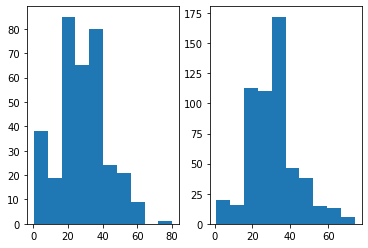

In [59]:
# Age

fig, ax3 = plt.subplots(1, 2)
survived = clean_train[clean_train['Survived'] == 1]
dead = clean_train[clean_train['Survived'] == 0]


ax3[0].hist(survived['Age'], label = 'Survivors\' age distribution')
ax3[1].hist(dead['Age'], label = 'Victims\' age distribution')

'''
The Sex vs. Survival bar plot shows that male has relatively low survival rate versus female
'''

In [43]:
print(clean_train.info())
clean_train.to_csv('data/clean_train.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB
None


In [41]:
raw_col = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_x = pd.get_dummies(clean_train[raw_col], )
x_col = train_x.columns

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x[x_col], clean_train[['Survived']])

## TODO:
# Divide into train&test set using maybe k-fold
# Select the best set of parameters using the test results
# Try numeric only first and then add on categorical ones to see if that affects much...
# skitlearn.metrics.precision_recall_fscore_support
# Use k-fold and calculate accuracy maybe for all folds, then give mean and standard deviation for evaluation sake. 

In [40]:
# Import data to predict
pred_data = pd.read_csv('data/test.csv').set_index('PassengerId')
print(pred_data)
print(pred_data.info())

             Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
...             ...                                           ...     ...   
1305              3                            Spector, Mr. Woolf    male   
1306              1                  Oliva y Ocana, Dona. Fermina  female   
1307              3                  Saether, Mr. Simon Sivertsen    male   
1308              3                           Ware, Mr. Frederick    male   
1309              3                      Peter, Master. Michael J    male   

In [42]:
# Transform data_pred to the same sturcture
# TODO: IMPUTATION on test data (or find other ways)
trans_pred = pd.get_dummies(pred_data[raw_col], )
pred_result = clf.predict(trans_pred)
print(pred_result)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').